# Цель лабораторной работы
Изучить различные методы визуализации данных<cite data-cite="ue:lab1"></cite>.

# Задание
Требуется выполнить следующие действия<cite data-cite="ue:lab1"></cite>:

* Выбрать набор данных (датасет).
* Создать ноутбук, который содержит следующие разделы:
    1. Текстовое описание выбранного набора данных.
    2. Основные характеристики датасета.
    3. Визуальное исследование датасета.
    4. Информация о корреляции признаков.
* Сформировать отчет и разместить его в&nbsp;своем репозитории на&nbsp;GitHub.

# Ход выполнения работы

## Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных [качество красного вина](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

Данный датасет содержит следующие колонки:

| Column | Description |
| --- | --- |
| fixed acidity | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste |
| citric acid | found in small quantities, citric acid can add 'freshness' and flavor to wines |
| residual sugar | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet |
| chlorides | the amount of salt in the wine |
| free sulfur dioxide | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale |
| sulphates | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant |
| alcohol | the percent alcohol content of the wine |
| quality | output variable (based on sensory data, score between 0 and 10) |

## Загрузка датасета

Загрузим файлы датасета в помощью библиотеки Pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# загрузка данных
data = pd.read_csv('data/winequality-red.csv', sep=',')
# вывод первых 5 строк из датасета
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [2]:
data.shape

(1599, 12)

In [3]:
# Размер датасета

print('Всего строк: {}'.format(data.shape[0]))
print('Всего колонок: {}'.format(data.shape[1]))

Всего строк: 1599
Всего колонок: 12


In [4]:
# Список колонок
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# Список колонок с типами данных
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# Проверим на наличие пустых значений

for col in data.columns:
    print('{} - {}'.format(col, data[data[col].isnull()].shape[0]))

fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0


In [7]:
# Основные статистические характеристки набора данных
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
# Определим уникальные значения для 'quality'
len(data['quality'].unique())

6

## Визуальное исследование датасета
### Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

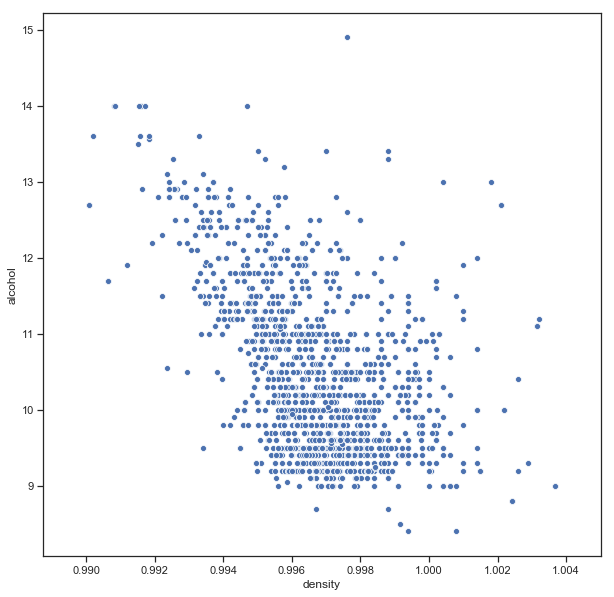

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='density', y='alcohol', data=data)

Можно видеть, что между полями density и alcohol не наблюдается зависимости.
Посмотрим как влияет целевой признак на данное отношение.

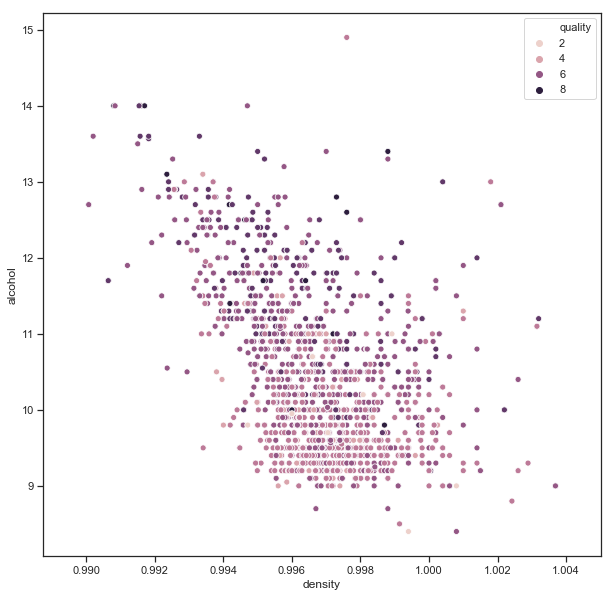

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='density', y='alcohol', data=data, hue='quality')

### Гистограмма
Позволяет оценить плотность вероятности распределения данных.

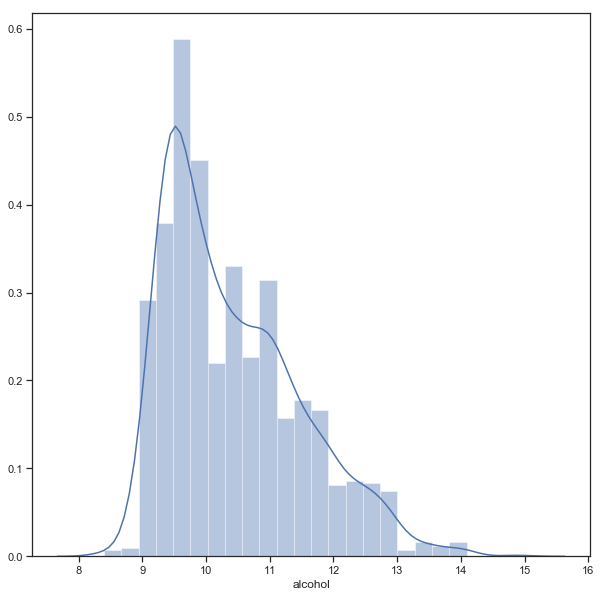

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['alcohol'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

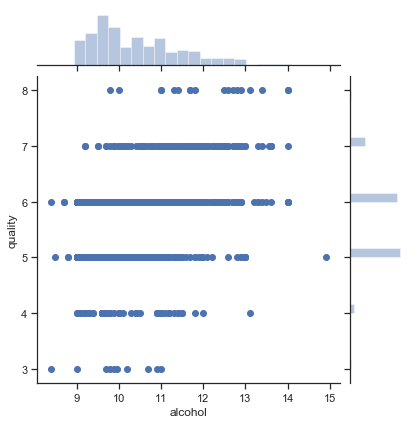

In [12]:
sns.jointplot(x='alcohol', y='quality', data=data)

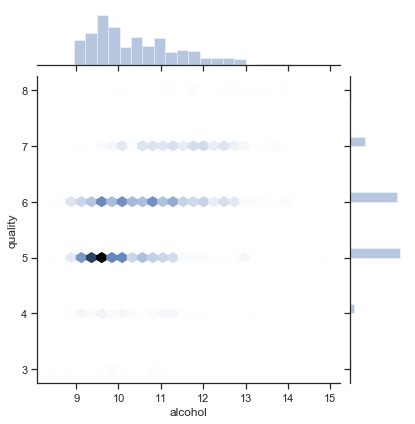

In [13]:
sns.jointplot(x='alcohol', y='quality', data=data, kind="hex")

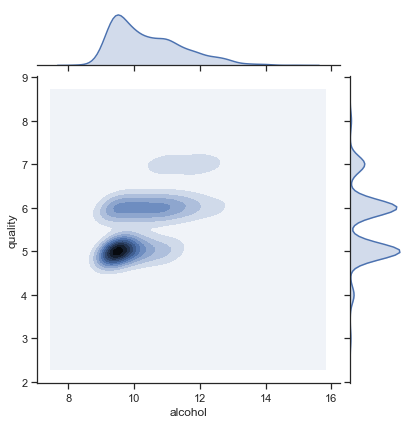

In [14]:
sns.jointplot(x='alcohol', y='quality', data=data, kind="kde")

### Парные диаграммы

Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

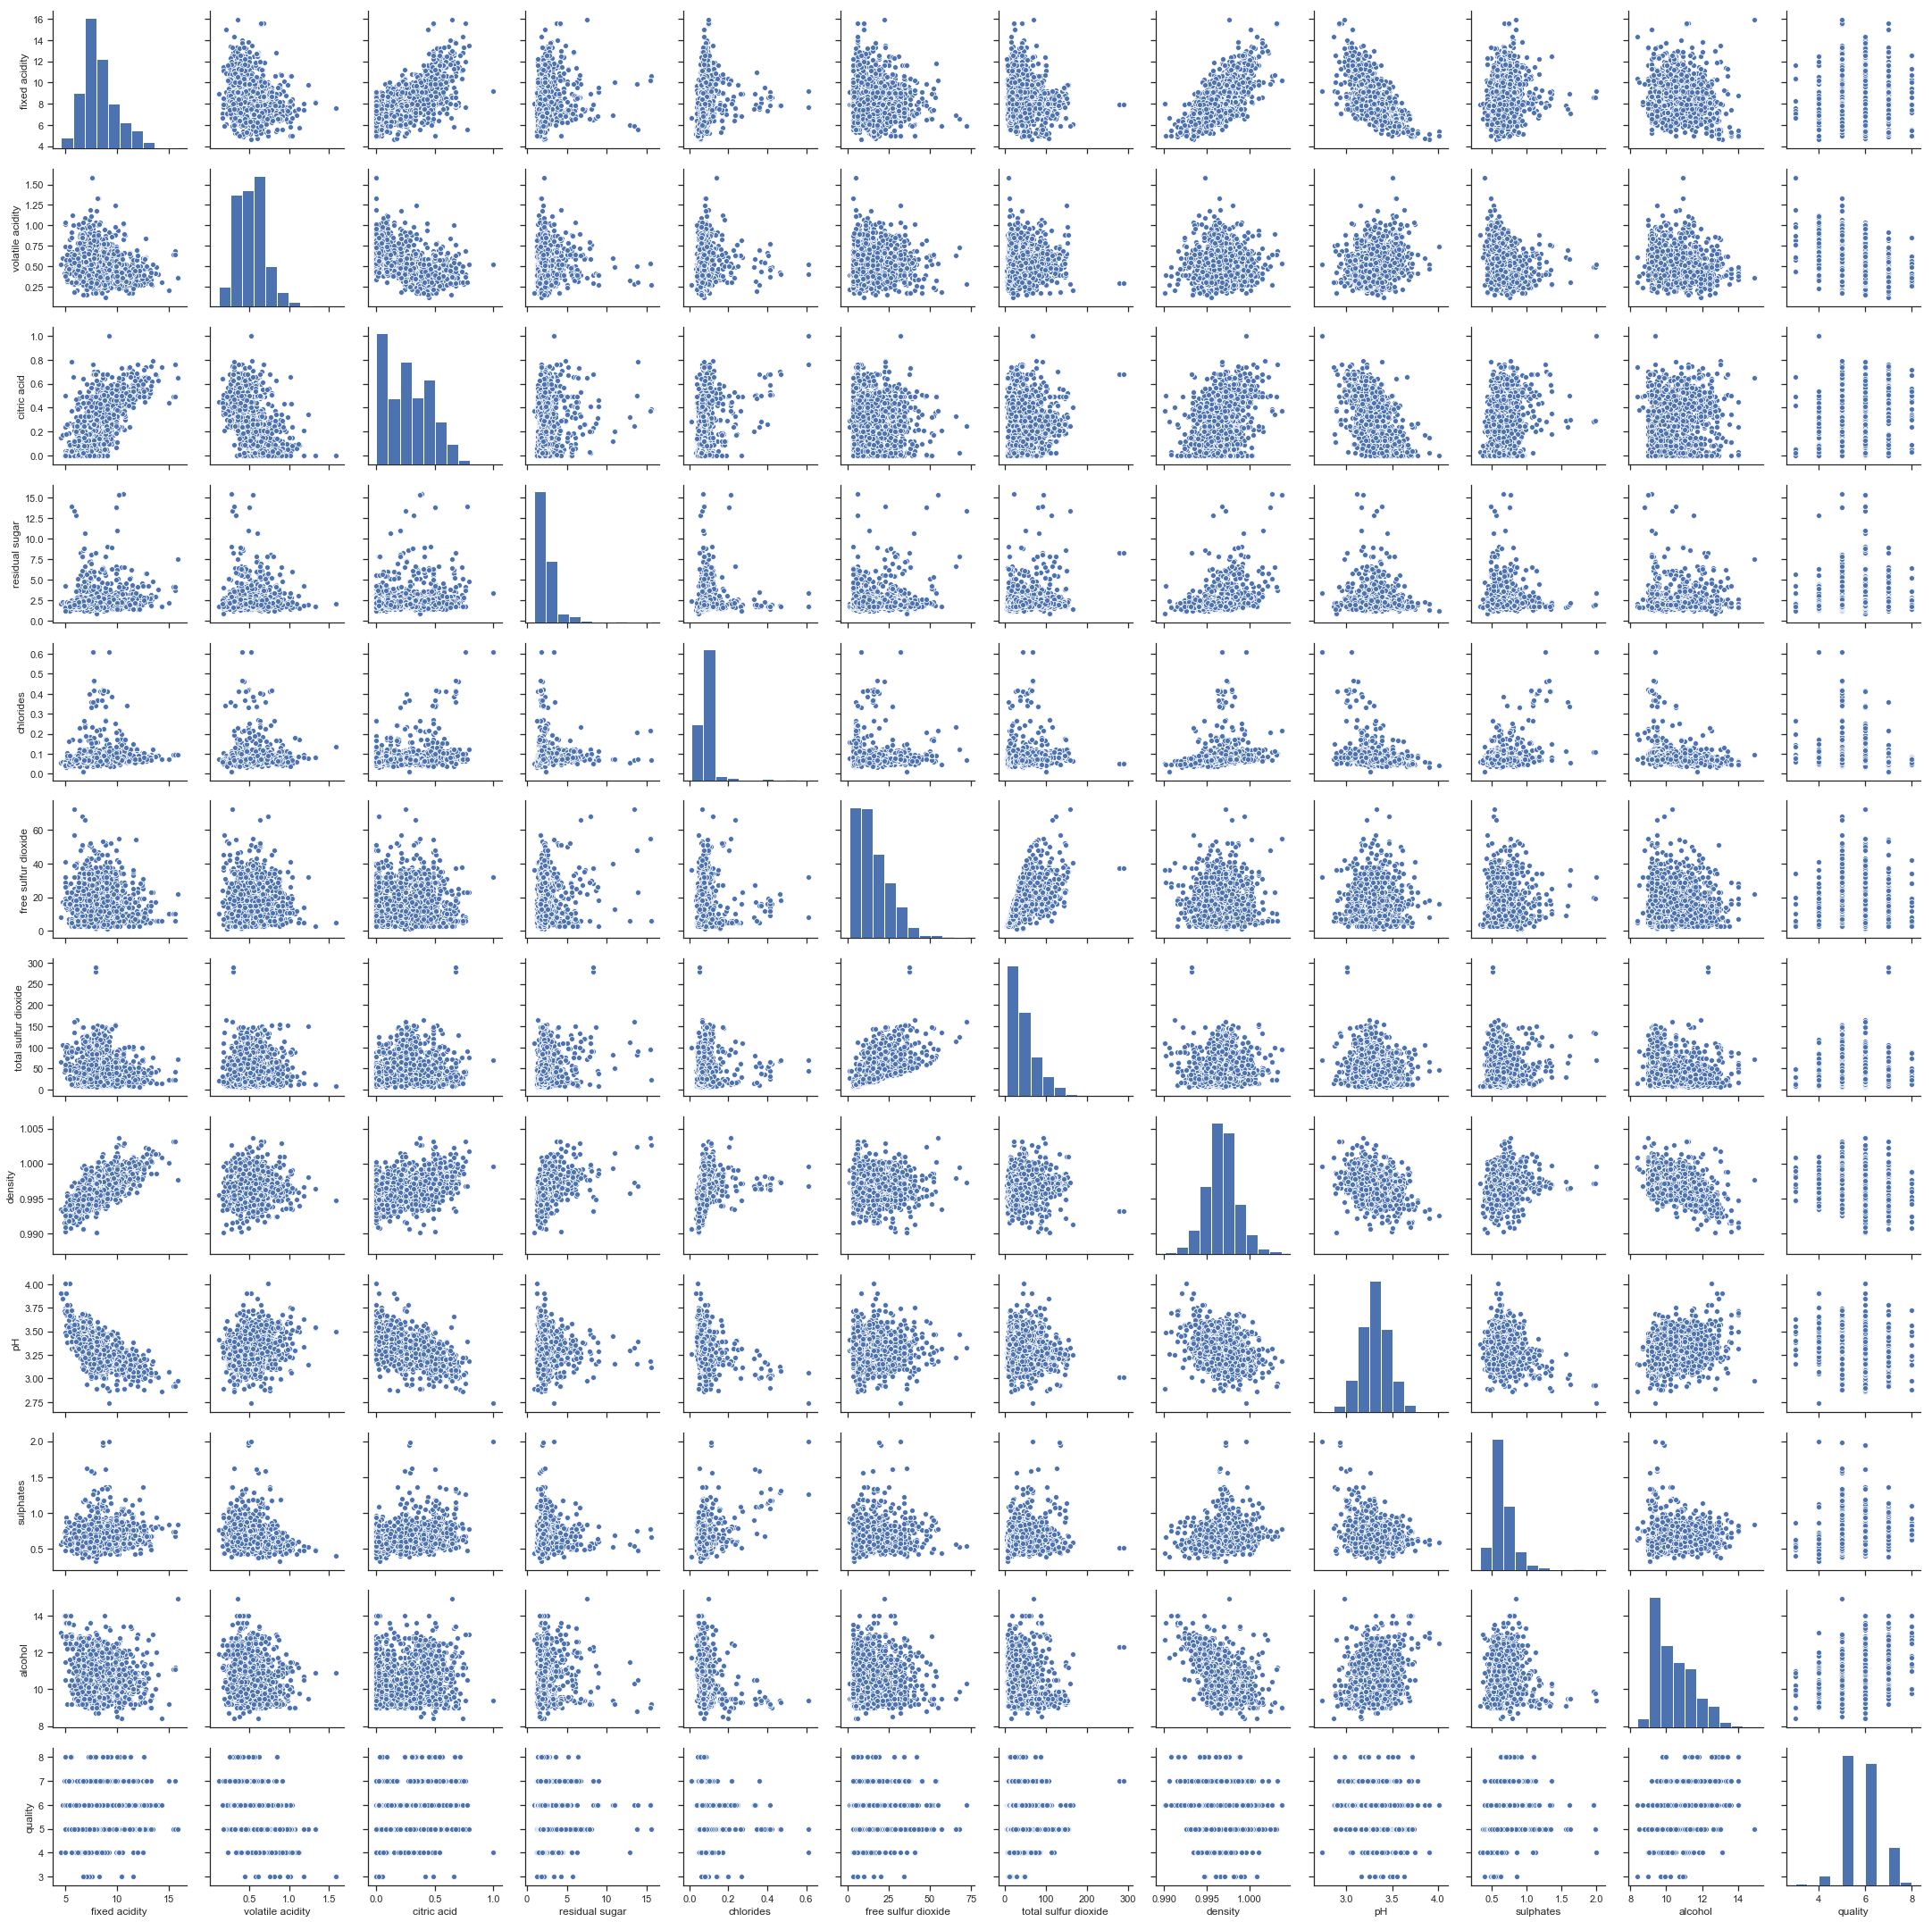

In [15]:
sns.pairplot(data)

### Ящик с усами

Отображает одномерное распределение вероятности.

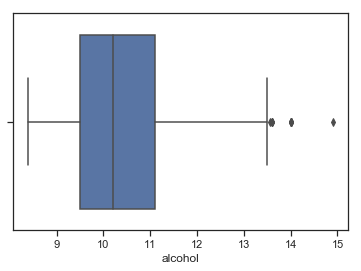

In [16]:
sns.boxplot(x=data['alcohol'])

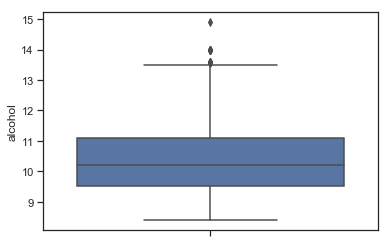

In [17]:
# По вертикали
sns.boxplot(y=data['alcohol'])

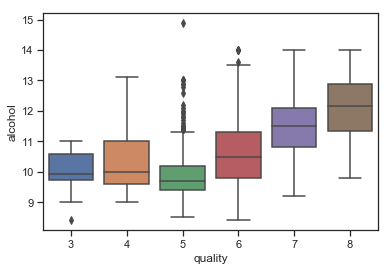

In [18]:
# Распределение параметра alcohol сгруппированные по quality.
sns.boxplot(x='quality', y='alcohol', data=data)

### Violin plot
Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных.

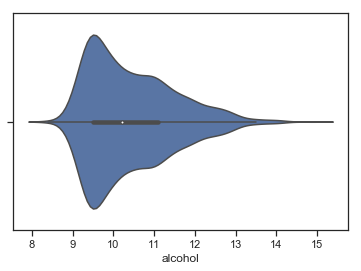

In [19]:
sns.violinplot(x=data['alcohol'])

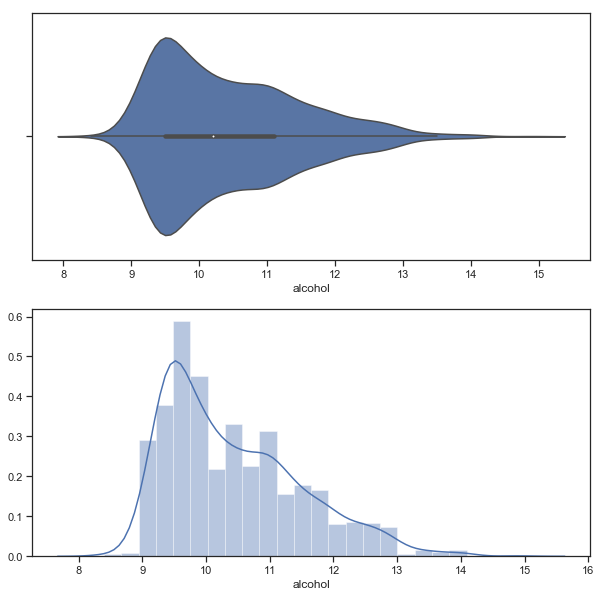

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['alcohol'])
sns.distplot(data['alcohol'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

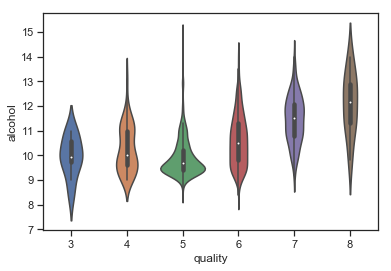

In [21]:
sns.violinplot(x='quality', y='alcohol', data=data)

## Информация о корреляции признаков

In [22]:
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

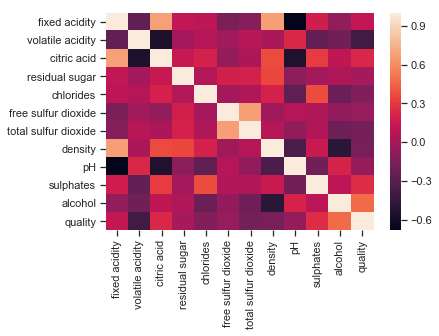

In [23]:
sns.heatmap(data.corr())

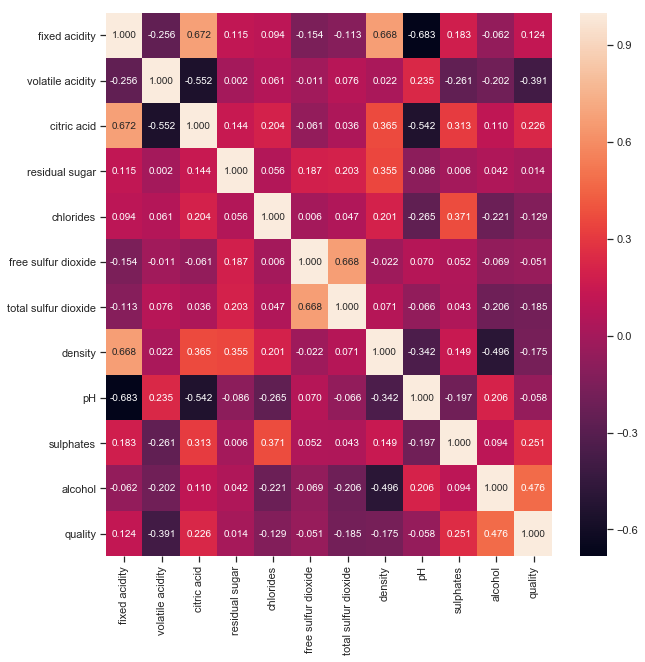

In [24]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), annot=True, fmt='.3f', ax=ax)

In [25]:
corr = data.corr()
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()
raw = corr.loc[m, m]
raw

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   

                      free sulfur dioxide  total sulfur dioxide   density  \
fixed acidity                   -0.153794             -0.113181  0.668047   
volatile acidity                -0.010504              0.076470  0.022026   
citric acid                     -0.060978              0.035533  0.364947   
free sulfur dioxide              1.000000              0.667666 -0.021946   
total sulfur dioxide             0.667666              1.000000  0.071269   
density                         -0.021946              0.071269  1.000000   
pH                               0.070377             -0.066495 -0.341699   

                            pH  
fixed acidity        -0.682978  
volatile acidity      0.234937  
citric acid          -0.541904  
free sulfur dioxide   0.070377  
total sulfur dioxide -0.066495  
density              -0.341699  
pH                    1.000000

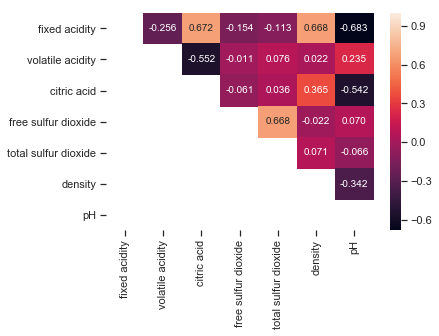

In [26]:
# Треугольный вариант матрицы
mask = np.zeros_like(raw, dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(raw, mask=mask, annot=True, fmt='.3f')